In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import glob
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.layers import Dropout
import math
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import sys
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

In [12]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set = train_datagen.flow_from_directory('C:/Users/KIIT/DATASET/TRAIN', target_size=(224,224), color_mode="rgb",batch_size=32, class_mode='binary')
test_datagen = idg(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:/Users/KIIT/DATASET/TEST', target_size=(224,224),color_mode="rgb", batch_size=32, class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [3]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [4]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

# Medium architecture second wala 

In [17]:
model =Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 128, activation = 'relu', input_dim = 64))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)         

In [18]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 132s 188ms/step - loss: 0.4938 - accuracy: 0.7813 - val_loss: 0.8710 - val_accuracy: 0.5738
Epoch 2/15
706/706 [==============================] - 117s 165ms/step - loss: 0.4480 - accuracy: 0.8101 - val_loss: 0.7812 - val_accuracy: 0.6351
Epoch 3/15
706/706 [==============================] - 136s 193ms/step - loss: 0.4260 - accuracy: 0.8223 - val_loss: 3.9143 - val_accuracy: 0.5595
Epoch 4/15
706/706 [==============================] - 151s 213ms/step - loss: 0.4201 - accuracy: 0.8246 - val_loss: 0.2900 - val_accuracy: 0.8949
Epoch 5/15
706/706 [==============================] - 146s 207ms/step - loss: 0.4066 - accuracy: 0.8309 - val_loss: 0.6576 - val_accuracy: 0.7334
Epoch 6/15
706/706 [==============================] - 152s 215ms/step - loss: 0.3924 - accuracy: 0.8378 - val_loss: 0.2837 - val_accuracy: 0.8830
Epoch 7/15
706/706 [==============================] - 147s 208ms/step - loss: 0.3880 - accuracy: 0.8420 - val_loss: 0.2954 -

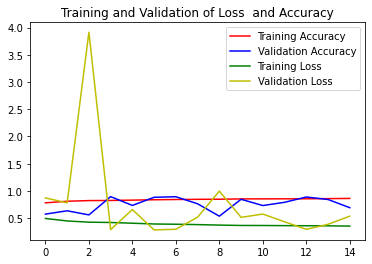

In [19]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [20]:
from glob import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 2s 32ms/step - loss: 0.5392 - accuracy: 0.6868
Loss on test set:  0.5391551852226257
Accuracy on test set:  0.6868284940719604
(2513,)
(2513,)


array([[1400,    1],
       [ 786,  326]], dtype=int64)

# Heavy architecture

In [43]:
model =Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(224,224,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3),padding = 'same', activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 1024, activation = 'relu', input_dim = 224))
model.add(Dense(units = 512,  activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 54, 54, 32)        9248      
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 27, 27, 64)      

In [44]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 969s 1s/step - loss: 0.5019 - accuracy: 0.7672 - val_loss: 0.4239 - val_accuracy: 0.8750
Epoch 2/15
706/706 [==============================] - 764s 1s/step - loss: 0.4206 - accuracy: 0.8251 - val_loss: 0.3512 - val_accuracy: 0.8846
Epoch 3/15
706/706 [==============================] - 765s 1s/step - loss: 0.3853 - accuracy: 0.8431 - val_loss: 0.3519 - val_accuracy: 0.8830
Epoch 4/15
706/706 [==============================] - 728s 1s/step - loss: 0.4270 - accuracy: 0.8132 - val_loss: 0.5876 - val_accuracy: 0.6140
Epoch 5/15
706/706 [==============================] - 859s 1s/step - loss: 0.4028 - accuracy: 0.8336 - val_loss: 0.4032 - val_accuracy: 0.8727
Epoch 6/15
706/706 [==============================] - 802s 1s/step - loss: 0.4271 - accuracy: 0.8151 - val_loss: 0.5651 - val_accuracy: 0.8034
Epoch 7/15
706/706 [==============================] - 729s 1s/step - loss: 0.3940 - accuracy: 0.8367 - val_loss: 0.4188 - val_accuracy: 0.8006

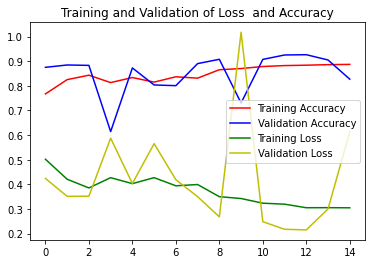

In [48]:
   from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [50]:
from glob import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 24s 300ms/step - loss: 0.6215 - accuracy: 0.8241
Loss on test set:  0.6215314269065857
Accuracy on test set:  0.8241146206855774
(2513,)
(2513,)


array([[1399,    2],
       [ 440,  672]], dtype=int64)

# DenseNet121

In [53]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

densenet121 = tf.keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

# don't train existing weights
for layer in densenet121.layers:
  layer.trainable = False

In [55]:
from keras.models import Model
folders = glob('DATASET/TRAIN/*')
x = Flatten()(densenet121.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=densenet121.input, outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [56]:
history  = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 2479s 4s/step - loss: 0.5985 - accuracy: 0.8034 - val_loss: 0.5736 - val_accuracy: 0.6828
Epoch 2/15
706/706 [==============================] - 2951s 4s/step - loss: 0.4801 - accuracy: 0.8672 - val_loss: 0.5076 - val_accuracy: 0.7163
Epoch 3/15
706/706 [==============================] - 3295s 5s/step - loss: 0.4085 - accuracy: 0.8828 - val_loss: 0.4655 - val_accuracy: 0.7366
Epoch 4/15
706/706 [==============================] - 3275s 5s/step - loss: 0.3638 - accuracy: 0.8852 - val_loss: 0.4413 - val_accuracy: 0.7461
Epoch 5/15
706/706 [==============================] - 2841s 4s/step - loss: 0.3343 - accuracy: 0.8851 - val_loss: 0.4259 - val_accuracy: 0.7497
Epoch 6/15
706/706 [==============================] - 1899s 3s/step - loss: 0.3156 - accuracy: 0.8846 - val_loss: 0.4151 - val_accuracy: 0.7521
Epoch 7/15
706/706 [==============================] - 1808s 3s/step - loss: 0.2998 - accuracy: 0.8892 - val_loss: 0.4089 - val_accuracy:

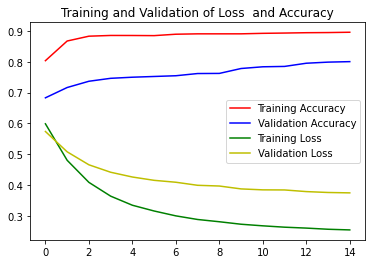

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [58]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 155s 2s/step - loss: 0.3760 - accuracy: 0.8030
Loss on test set:  0.37596210837364197
Accuracy on test set:  0.8030242919921875
(2513,)
(2513,)


array([[1308,   93],
       [ 402,  710]], dtype=int64)

# efficientb0 

In [27]:
IMAGE_SIZE = [224,224]
train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'
effb0 = tf.keras.applications.EfficientNetB0(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
for layer in effb0.layers:
    layer.trainable = False

In [28]:
from glob import glob
from keras.models import load_model
from keras.models import Model
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(effb0.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=effb0.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 224, 224, 3)  7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_3[0][0]            
_______________________________________________________________________________________

Total params: 5,332,573
Trainable params: 2,002
Non-trainable params: 5,330,571
__________________________________________________________________________________________________


In [29]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
287/706 [===========>..................] - ETA: 11:27 - loss: 0.6931 - accuracy: 0.4921

KeyboardInterrupt: 

In [39]:
IMAGE_SIZE = [64,64]
train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'
rn152v2 = tf.keras.applications.ResNet152V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
for layer in rn152v2.layers:
    layer.trainable = False



In [40]:
from glob import glob
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(rn152v2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=rn152v2.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________

In [41]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 285s 404ms/step - loss: 0.6499 - accuracy: 0.6352 - val_loss: 0.6255 - val_accuracy: 0.6403
Epoch 2/15
706/706 [==============================] - 271s 384ms/step - loss: 0.5958 - accuracy: 0.7200 - val_loss: 0.5859 - val_accuracy: 0.7282
Epoch 3/15
706/706 [==============================] - 241s 341ms/step - loss: 0.5603 - accuracy: 0.7501 - val_loss: 0.5596 - val_accuracy: 0.7469
Epoch 4/15
706/706 [==============================] - 242s 343ms/step - loss: 0.5395 - accuracy: 0.7575 - val_loss: 0.5410 - val_accuracy: 0.7660
Epoch 5/15
706/706 [==============================] - 264s 374ms/step - loss: 0.5225 - accuracy: 0.7656 - val_loss: 0.5278 - val_accuracy: 0.7664
Epoch 6/15
706/706 [==============================] - 273s 387ms/step - loss: 0.5132 - accuracy: 0.7647 - val_loss: 0.5208 - val_accuracy: 0.7660
Epoch 7/15
706/706 [==============================] - 263s 373ms/step - loss: 0.5036 - accuracy: 0.7672 - val_loss: 0.5151 -

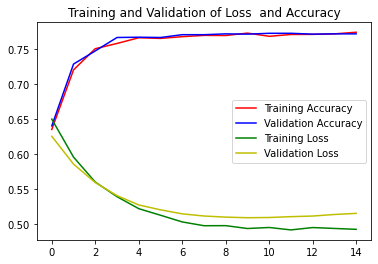

In [43]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [44]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 148s 2s/step - loss: 0.3993 - accuracy: 0.8237
Loss on test set:  0.39932432770729065
Accuracy on test set:  0.8237167000770569
(2513,)
(2513,)


array([[1284,  117],
       [ 326,  786]], dtype=int64)

# Densenet 169

In [45]:
IMAGE_SIZE = [64,64]
train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'
dn169 = tf.keras.applications.DenseNet169(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)
for layer in dn169.layers:
    layer.trainable = False


In [46]:
from glob import glob
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(dn169.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=dn169.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________

conv5_block17_0_bn (BatchNormal (None, 7, 7, 1152)   4608        conv5_block16_concat[0][0]       
__________________________________________________________________________________________________
conv5_block17_0_relu (Activatio (None, 7, 7, 1152)   0           conv5_block17_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block17_1_conv (Conv2D)   (None, 7, 7, 128)    147456      conv5_block17_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block17_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block17_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block17_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block17_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_bloc

In [47]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 344s 488ms/step - loss: 0.6408 - accuracy: 0.6618 - val_loss: 0.6071 - val_accuracy: 0.6578
Epoch 2/15
706/706 [==============================] - 348s 493ms/step - loss: 0.5716 - accuracy: 0.7651 - val_loss: 0.5575 - val_accuracy: 0.7553
Epoch 3/15
706/706 [==============================] - 362s 512ms/step - loss: 0.5276 - accuracy: 0.7870 - val_loss: 0.5262 - val_accuracy: 0.7732
Epoch 4/15
706/706 [==============================] - 317s 449ms/step - loss: 0.4962 - accuracy: 0.7913 - val_loss: 0.5057 - val_accuracy: 0.7843
Epoch 5/15
706/706 [==============================] - 318s 450ms/step - loss: 0.4793 - accuracy: 0.7866 - val_loss: 0.4936 - val_accuracy: 0.7883
Epoch 6/15
706/706 [==============================] - 311s 440ms/step - loss: 0.4628 - accuracy: 0.7956 - val_loss: 0.4858 - val_accuracy: 0.7899
Epoch 7/15
706/706 [==============================] - 330s 467ms/step - loss: 0.4576 - accuracy: 0.7925 - val_loss: 0.4828 -

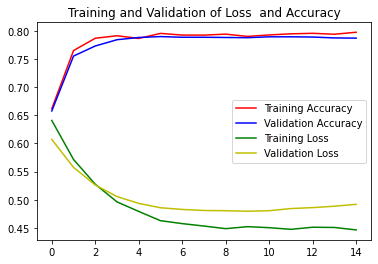

In [48]:

from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [49]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 202s 3s/step - loss: 0.3756 - accuracy: 0.8472
Loss on test set:  0.37560757994651794
Accuracy on test set:  0.8471946120262146
(2513,)
(2513,)


array([[1285,  116],
       [ 268,  844]], dtype=int64)

# adam last 2 

In [9]:
model =Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 128, activation = 'relu', input_dim = 64))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          1

In [10]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 230s 325ms/step - loss: 0.4825 - accuracy: 0.7886 - val_loss: 0.5411 - val_accuracy: 0.7254
Epoch 2/15
706/706 [==============================] - 125s 177ms/step - loss: 0.4297 - accuracy: 0.8229 - val_loss: 0.3058 - val_accuracy: 0.8934
Epoch 3/15
706/706 [==============================] - 130s 185ms/step - loss: 0.4059 - accuracy: 0.8339 - val_loss: 0.3097 - val_accuracy: 0.8778
Epoch 4/15
706/706 [==============================] - 121s 171ms/step - loss: 0.3921 - accuracy: 0.8414 - val_loss: 0.4420 - val_accuracy: 0.7772
Epoch 5/15
706/706 [==============================] - 122s 173ms/step - loss: 0.3864 - accuracy: 0.8445 - val_loss: 0.2848 - val_accuracy: 0.8957
Epoch 6/15
706/706 [==============================] - 121s 171ms/step - loss: 0.3800 - accuracy: 0.8468 - val_loss: 0.2986 - val_accuracy: 0.8926
Epoch 7/15
706/706 [==============================] - 124s 175ms/step - loss: 0.3716 - accuracy: 0.8549 - val_loss: 0.4538 -

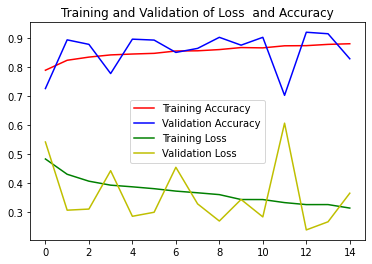

In [11]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [13]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 1s 16ms/step - loss: 0.3500 - accuracy: 0.8424
Loss on test set:  0.34998443722724915
Accuracy on test set:  0.842419445514679
(2513,)
(2513,)


array([[1063,  338],
       [  58, 1054]], dtype=int64)

In [25]:
model =Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(224,224,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3),padding = 'same', activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 1024, activation = 'relu', input_dim =224))
model.add(Dense(units = 512,  activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 54, 54, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 27, 27, 64)       

In [26]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 727s 1s/step - loss: 0.4726 - accuracy: 0.7947 - val_loss: 0.3873 - val_accuracy: 0.8679
Epoch 2/15
706/706 [==============================] - 743s 1s/step - loss: 0.4073 - accuracy: 0.8350 - val_loss: 0.5364 - val_accuracy: 0.7640
Epoch 3/15
706/706 [==============================] - 740s 1s/step - loss: 0.3787 - accuracy: 0.8517 - val_loss: 0.2968 - val_accuracy: 0.8878
Epoch 4/15
706/706 [==============================] - 739s 1s/step - loss: 0.3650 - accuracy: 0.8606 - val_loss: 0.2631 - val_accuracy: 0.8961
Epoch 5/15
706/706 [==============================] - 735s 1s/step - loss: 0.3520 - accuracy: 0.8667 - val_loss: 0.8628 - val_accuracy: 0.6765
Epoch 6/15
706/706 [==============================] - 735s 1s/step - loss: 0.3485 - accuracy: 0.8682 - val_loss: 0.2676 - val_accuracy: 0.8953
Epoch 7/15
706/706 [==============================] - 729s 1s/step - loss: 0.3268 - accuracy: 0.8775 - val_loss: 0.2531 - val_accuracy: 0.9041

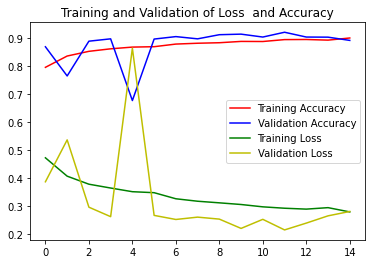

In [27]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [29]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 18s 223ms/step - loss: 0.2529 - accuracy: 0.9041
Loss on test set:  0.25288620591163635
Accuracy on test set:  0.9040986895561218
(2513,)
(2513,)


array([[1200,  201],
       [  40, 1072]], dtype=int64)

In [34]:
model =Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 128, activation = 'relu', input_dim = 64))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))
model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 4, 4, 64)         

In [35]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 180s 255ms/step - loss: 0.5565 - accuracy: 0.7697 - val_loss: 0.3252 - val_accuracy: 0.8420
Epoch 2/15
706/706 [==============================] - 139s 197ms/step - loss: 0.4705 - accuracy: 0.7962 - val_loss: 0.2684 - val_accuracy: 0.8774
Epoch 3/15
706/706 [==============================] - 138s 196ms/step - loss: 0.4392 - accuracy: 0.8086 - val_loss: 0.2963 - val_accuracy: 0.8747
Epoch 4/15
706/706 [==============================] - 139s 197ms/step - loss: 0.4236 - accuracy: 0.8154 - val_loss: 0.3822 - val_accuracy: 0.8158
Epoch 5/15
706/706 [==============================] - 142s 201ms/step - loss: 0.4116 - accuracy: 0.8207 - val_loss: 0.6348 - val_accuracy: 0.6160
Epoch 6/15
706/706 [==============================] - 137s 194ms/step - loss: 0.3939 - accuracy: 0.8260 - val_loss: 0.2742 - val_accuracy: 0.8846
Epoch 7/15
706/706 [==============================] - 137s 194ms/step - loss: 0.3801 - accuracy: 0.8346 - val_loss: 0.3050 -

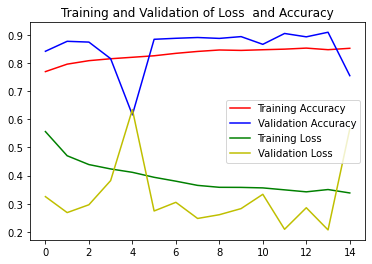

In [36]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [39]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 3s 35ms/step - loss: 1.4463 - accuracy: 0.5000
Loss on test set:  1.4463481903076172
Accuracy on test set:  0.5
(2513,)
(2513,)


array([[1401,    0],
       [1112,    0]], dtype=int64)

In [40]:
y_pred = []
y_test = []

In [46]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = model.predict(test_image)
    y_test.append('O')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')
        
d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = model.predict(test_image)
    y_test.append('R')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')

[-2.198613]
[-2.2537334]
[-2.185959]
[-1.9016955]
[-2.2403646]
[-2.073785]
[-2.0943377]
[-2.1150222]
[-2.4512036]
[-2.0403473]
[-2.2348719]
[-2.0780497]
[-1.8155303]
[-2.1967933]
[-1.836018]
[-2.0001519]
[-1.7346566]
[-2.7389326]
[-2.198409]
[-2.1162133]
[-1.8877634]
[-2.050032]
[-2.2299376]
[-2.0993154]
[-1.9756944]
[-2.2205417]
[-2.3057492]
[-2.4334538]
[-2.0366328]
[-2.119193]
[-1.9904517]
[-2.0634744]
[-1.8449167]
[-2.1900835]
[-2.090122]
[-2.4024124]
[-1.9496933]
[-2.3535938]
[0.20825762]
[-1.797063]
[-2.0274713]
[-2.0722063]
[-2.1644728]
[-2.3061578]
[-2.1288204]
[-1.7281196]
[-1.9593469]
[-2.1248567]
[-2.119393]
[-2.0902483]
[-2.0955665]
[-2.188261]
[-2.1907663]
[-1.8894248]
[-2.0184891]
[-2.299664]
[-2.0806687]
[-2.277127]
[-2.2013874]
[-1.8491025]
[-2.0999665]
[-1.9983765]
[-2.3173182]
[-1.4234252]
[-2.4631855]
[-2.2970293]
[-2.1500702]
[-2.1494784]
[-2.2447019]
[-2.227418]
[-2.174563]
[-2.338537]
[-2.1919637]
[-1.8817184]
[-2.0727527]
[-2.0435355]
[-1.5576862]
[-2.3448403]
[1

[-2.2767088]
[-1.8945113]
[-1.8277922]
[-2.16218]
[-2.0172684]
[-1.9113337]
[-2.1082296]
[-1.7381806]
[-1.802216]
[-2.267814]
[-2.2205405]
[-1.9847257]
[-2.3287246]
[-2.3635323]
[-2.1995573]
[-2.1366436]
[-2.3210745]
[-2.1581266]
[-2.516896]
[-1.9475223]
[-2.180375]
[-2.038111]
[-2.435673]
[-2.4879327]
[-1.8385847]
[-1.9454074]
[-2.1291487]
[-2.2198653]
[-2.015952]
[-2.1737382]
[-1.9726322]
[-2.076254]
[-2.0188391]
[-2.3328042]
[-2.400377]
[-2.2810602]
[-1.7506678]
[-1.665359]
[-2.0647879]
[-2.148691]
[-1.8338062]
[-2.2068717]
[-2.3063617]
[-1.986639]
[-1.9418812]
[-1.9135758]
[-2.810821]
[-1.6870664]
[-2.008808]
[-2.0163567]
[-2.1642313]
[-2.0466962]
[-2.3971965]
[-2.6407475]
[-2.1137533]
[-2.216408]
[-2.3159177]
[-2.0804489]
[-1.9097084]
[-2.4144604]
[-2.1465197]
[-2.033542]
[-2.4000661]
[-2.1083038]
[-1.8433295]
[-2.087837]
[-2.0822308]
[-2.078919]
[-2.0980675]
[-2.0409472]
[-1.7786863]
[-2.1174872]
[-1.7095997]
[-2.108473]
[-2.1039584]
[-2.6341984]
[-2.2340407]
[-2.177581]
[-2.2983

[-1.8424802]
[-1.8468511]
[-2.1331184]
[-1.9418725]
[-1.919503]
[-2.1398294]
[-1.8498821]
[-2.201524]
[-2.1980002]
[-2.275466]
[-1.8088368]
[1.1951902]
[-2.0768368]
[-1.9824212]
[-2.0216863]
[-1.967011]
[-2.168822]
[-2.0214849]
[-1.9224888]
[0.21661115]
[-1.8594882]
[-1.8963097]
[-1.961531]
[-2.4437773]
[-2.4290464]
[-1.9912385]
[-2.1343815]
[-2.0544589]
[-2.2365353]
[-1.870329]
[-1.967947]
[-1.6532718]
[-1.7594321]
[-2.0712726]
[-2.2437663]
[-2.1628532]
[-1.8996118]
[-2.004121]
[-1.9657478]
[-2.1568475]
[-2.2532728]
[-2.0071576]
[-2.150866]
[-2.1198118]
[-2.0785675]
[-2.1951632]
[-1.929267]
[-1.8674947]
[-2.4808698]
[-2.0581262]
[-1.7793667]
[0.29276332]
[-1.8806678]
[-2.03919]
[-1.8760531]
[-1.9443362]
[-1.9981006]
[-1.9817115]
[-2.2712781]
[-2.0502148]
[-2.2601948]
[-2.264319]
[-1.9966444]
[-1.336782]
[-2.1673143]
[-2.202774]
[-2.1507568]
[-2.095689]
[-2.0759628]
[-2.1457648]
[-2.0872846]
[-2.0259905]
[-2.1402104]
[-2.1050172]
[-2.0698712]
[-2.2229795]
[-2.3315845]
[-2.1403444]
[-1.

[1.2802217]
[-1.904277]
[-1.8727564]
[1.5499367]
[-1.9082597]
[2.3593166]
[-1.156514]
[-1.876319]
[-1.7195958]
[-0.16245224]
[-1.4476469]
[0.01256824]
[-1.8614445]
[0.2146768]
[0.52324176]
[0.2409583]
[0.9573047]
[-2.1743376]
[-1.533795]
[0.20192856]
[-1.9570513]
[0.4397187]
[-0.02401617]
[-1.6698142]
[-1.3063236]
[-2.1497934]
[-1.9717616]
[-1.827979]
[-2.0644143]
[-2.1012752]
[-1.2287209]
[-0.2920117]
[0.26420572]
[-2.40741]
[-1.161861]
[-1.8443633]
[2.5871701]
[-1.2147875]
[-1.9299805]
[1.9321542]
[2.7746756]
[1.2863394]
[-1.982092]
[1.3475424]
[1.9697106]
[2.350263]
[-0.7001195]
[-0.5782304]
[1.5073705]
[2.0883641]
[-2.1753976]
[2.4209206]
[-1.2730086]
[-1.8444521]
[1.3814032]
[1.7457306]
[1.4806632]
[-1.9709405]
[1.96046]
[-0.44475186]
[-1.9563853]
[-1.8091879]
[2.2038734]
[-2.097161]
[-1.8232166]
[-0.08461642]
[2.068334]
[-1.8142096]
[0.05476436]
[-1.6862243]
[-0.7238829]
[-0.24730355]
[0.17425439]
[-1.9833922]
[2.4248621]
[-1.3340484]
[-0.1794122]
[1.3702954]
[-1.7835686]
[2.5955

In [47]:
Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
from sklearn.metrics import confusion_matrix as cm
cm_CNN_model_2 = cm(Y_test,Y_pred)

In [48]:
print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_2

(2513,)
(2513,)


array([[1394,    7],
       [ 561,  551]], dtype=int64)

In [13]:
model =Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(224,224,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3),padding = 'same', activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 1024, activation = 'relu', input_dim = 224))
model.add(Dense(units = 512,  activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))
model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 54, 54, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 27, 27, 64)       

In [14]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 1100s 2s/step - loss: 0.5786 - accuracy: 0.7507 - val_loss: 2.0020 - val_accuracy: 0.5575
Epoch 2/15
706/706 [==============================] - 1047s 1s/step - loss: 0.5515 - accuracy: 0.7547 - val_loss: 0.8230 - val_accuracy: 0.5635
Epoch 3/15
706/706 [==============================] - 890s 1s/step - loss: 0.5034 - accuracy: 0.7735 - val_loss: 0.4369 - val_accuracy: 0.8643
Epoch 4/15
706/706 [==============================] - 864s 1s/step - loss: 0.4580 - accuracy: 0.8007 - val_loss: 0.3147 - val_accuracy: 0.8882
Epoch 5/15
706/706 [==============================] - 863s 1s/step - loss: 0.4425 - accuracy: 0.8037 - val_loss: 0.3434 - val_accuracy: 0.8977
Epoch 6/15
706/706 [==============================] - 885s 1s/step - loss: 0.4326 - accuracy: 0.8138 - val_loss: 0.2846 - val_accuracy: 0.8727
Epoch 7/15
706/706 [==============================] - 910s 1s/step - loss: 0.5125 - accuracy: 0.7724 - val_loss: 0.5093 - val_accuracy: 0.77

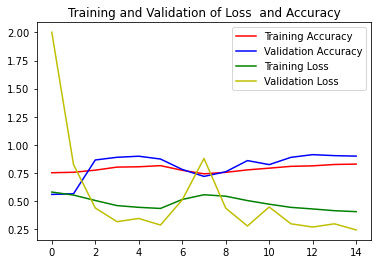

In [15]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [18]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = model.predict(test_image)
    y_test.append('O')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')
        
d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = model.predict(test_image)
    y_test.append('R')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')

[-1.9094993]
[-3.531552]
[-1.5420064]
[-1.3355154]
[-0.6184054]
[-1.9798648]
[-0.9511262]
[-2.073051]
[-2.8096051]
[-1.5566484]
[-2.1247857]
[-2.5051436]
[0.5904211]
[-2.0244133]
[-1.0139526]
[-1.1527394]
[-0.29347172]
[-3.0209634]
[-2.4458265]
[-1.1794884]
[-0.4970101]
[-0.35571]
[-1.2815826]
[-2.3464646]
[-1.1099881]
[-1.9997807]
[-1.9787984]
[-2.7147894]
[-1.90479]
[-1.7248853]
[-2.672919]
[-1.7585046]
[-1.6232749]
[-0.24648158]
[-1.542238]
[-2.051609]
[-1.244951]
[-2.0082529]
[1.688606]
[-1.6461629]
[-0.7175549]
[-3.1077886]
[-2.2690551]
[-2.1381302]
[-1.7325852]
[-0.02199794]
[-0.20608054]
[-2.3878396]
[-0.4428371]
[-2.0727944]
[-1.9495561]
[-1.7525105]
[-1.9130956]
[-0.07122083]
[-1.3586314]
[-1.6789697]
[-1.5789875]
[-2.520579]
[-1.9688448]
[-1.6554775]
[-1.6567811]
[-1.6379597]
[-2.1019685]
[-0.5559011]
[-2.0019486]
[-2.5910132]
[-1.1808894]
[-2.7056904]
[-2.2676563]
[-1.5202943]
[-3.3882835]
[-2.4388678]
[-2.4462104]
[-1.0523535]
[-1.864579]
[0.03437231]
[-0.45572138]
[-2.6278

[-1.388535]
[-3.1045878]
[-2.3243353]
[-2.3946915]
[-2.8223498]
[-1.7063682]
[-1.6593415]
[-2.0118732]
[-0.04730393]
[-0.4998114]
[-2.2077458]
[-1.9465275]
[-1.131263]
[-1.8138096]
[-0.5278942]
[-0.6833509]
[-1.8295801]
[-2.3963928]
[-0.6708345]
[-2.199554]
[-3.179274]
[-2.7664664]
[-2.2441254]
[-2.4889147]
[-2.084122]
[-3.158417]
[-2.200993]
[-3.2612813]
[-2.6257584]
[-2.30834]
[-3.9114978]
[-0.8478094]
[-0.8961684]
[-2.4347415]
[-1.8354785]
[-1.4709736]
[-3.0039332]
[-0.9749006]
[-2.1391969]
[-1.0258553]
[-1.8454243]
[-2.9296107]
[-3.201343]
[0.7057829]
[0.74496347]
[-2.1210518]
[-1.9879669]
[-0.70202655]
[-1.8124368]
[-3.4027364]
[-1.4828506]
[-1.4593906]
[-1.2244377]
[-2.4782836]
[-0.04020765]
[-1.0895092]
[-1.0449806]
[-1.797621]
[-1.8251929]
[-2.7557018]
[-2.6683674]
[-1.6329126]
[-2.098559]
[-3.2377305]
[-1.1093984]
[-2.4371722]
[-1.6862357]
[-2.221515]
[-1.6474285]
[-2.177527]
[-2.2482436]
[-1.0885639]
[-2.953699]
[-1.4654486]
[-0.8811964]
[-2.1088293]
[-2.198655]
[1.4270691]
[

[-2.4397879]
[-1.5847218]
[-0.52643263]
[-2.6485205]
[0.03306518]
[0.22947942]
[-1.0232248]
[-2.1567013]
[-1.6206585]
[-2.000665]
[-2.5994642]
[-0.6482377]
[-0.76751536]
[-1.066934]
[-0.5910642]
[-1.7957131]
[-2.4065084]
[-0.5583025]
[-1.991275]
[-0.4156717]
[-1.5188318]
[-1.6761622]
[-1.632245]
[-0.0692915]
[2.2543368]
[-0.8131972]
[-1.2560229]
[-0.74841005]
[-0.7252044]
[-2.1122768]
[-1.6141883]
[-1.0529004]
[0.9769685]
[-0.2804108]
[-1.0785213]
[-1.685456]
[-1.9332509]
[-2.0493932]
[-0.8667734]
[-1.7862113]
[-1.6956494]
[-1.9325483]
[0.07320975]
[-0.7756301]
[0.67731714]
[-0.29692787]
[-1.4314773]
[-1.9949867]
[-2.3902566]
[-1.0466136]
[-1.4045213]
[-0.5549082]
[-2.3006966]
[-2.1117218]
[-1.1048559]
[-1.7800866]
[-1.1211908]
[-1.6031315]
[-1.9923792]
[-1.1102681]
[-0.30185592]
[-2.5017216]
[-1.2718816]
[0.61558247]
[1.3130015]
[-0.6610823]
[-1.346476]
[-0.9790686]
[-0.74952304]
[-0.52342474]
[-0.8042679]
[-1.4001975]
[-2.0708685]
[-2.5254853]
[-2.2016401]
[-2.2005217]
[0.4350599]
[-

In [20]:
Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
from sklearn.metrics import confusion_matrix as cm
cm_CNN_model_2 = cm(Y_test,Y_pred)

In [21]:
print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_2

(2513,)
(2513,)


array([[1312,   89],
       [ 142,  970]], dtype=int64)

In [23]:
(1312+970)/2513

0.9080779944289693